# PROLOGUE

When I started this coursework and found the data my intention was to use it for NLP. In the course of coding, as with any coding endevour, ambition got the better of me. What has happened is that it is a Natural Language Programming and Neural Netowrk Coursework in one. Data collected is processed textwise and run through various shallow models. Then it is processed further and turned into vectorized data and put through a neural network. There aim was to compare the overall results of shallow models and deep models. I do hope you allow me this extravagance of posting this coursework for both NLP and Neural Network classes. The reason i chose to do it this way is because it offers me the ability to play with raw data clean it, process it, and trying to make sense of the models. A lot of data online whether for NLP or NN is pre-processed and just requires building a model.

# 1. Introduction

This coursework project is a classification exercise to develop a text classfier and apply it to the specific problem of spam detection in the comments section of YouTube Videos. It is inspired and partly based on the works of Túlio C. Alberto, Johannes V. Lochter, and Tiago A. Almeida in their 2015 paper titled:
> "TupeSpam: Comment Spam Filtering on YouTube"

There paper can be read by clicking the following link: [Paper](https://www.dt.fee.unicamp.br/~tiago/papers/TCA_ICMLA15.pdf)

## 1.1 Problem Area.
"The profitability promoted by Google in its brand new video distribution platform YouTube has attracted an increasing number of users. However, such success has also attracted malicious users, which aim to self-promote their videos or disseminate viruses and malwares. Since YouTube offers limited tools for comment moderation, the spam volume is shockingly increasing which lead owners of famous channels to disable the comments section in their videos. Automatic comment spam filtering on YouTube is a challenge even for established classification methods, since the messages are very short and often rife with slangs, symbols and abbreviations."(Alberto et al: 2015. Page 1)

Social media platforms are moving away from viewership based metrircs to engagement based models. This is to promote users to use and subscribe to the platforms more. That is to make them more "social" than a place to go and just "view". The problem and challenge with spam comments is that it negatively affects the user experience and stops prominent brands from linking their products with such comments affecting the profitabilty of social media companies.

## 1.2 Objectives.
The objectives of this work is to build a text classifier to classfy spam comments correctly using the work of Alberto et al as a reference and benchmark. If a social media platform can accurately and cheaply identify spam comments they can be removed and in turn increase the user experience. THis in turn will allow prominen tbrands to feel confident and advertise more on social media platforms without fear of negative association to illict activities.

In their work,ALberto et al used a total of 10 classification techniques. I wish to simplify the process and limit the process to 3 classification techniques:
- Multinomial Naive Bayes
- Logistic Regression
- Random Forests.

The reason for limiting it to these three techniques:
- is to be thorough and have an abundance of literature and coding examples to fall on should I get stuck. 
- to limit computational power which can be expensive if models take to long to run. 
- to reach the same level of classification accuracy as Alberto et al. 

In addition to these three I will process the data further and run it through a:
- Neural Netowrk.

This is to:
- compare shallow learning to deep learning.
- to establish if it is necessary to always jump to Neural Networks or are simple models just as reliable.


## 1.3 Data Set.
I will be using an open-source Youtube Spam Collection dataset from the UCI machine learning repository, a dataset that contains 1956 instances. The data set can be downloaded by [clicking here](https://archive-beta.ics.uci.edu/ml/datasets/youtube+spam+collection).

The data includes comments from some of the most watched Youtube channels:
- Psy
- Katty Perry
- LMFAO
- Eminem
- Shakira

## 1.4 Evaluation Methodolgy.
THe evaluation of this model will be __Accuracy__. Accuracy is a metric for evaluating classification models. Accuracy is the fraction of predictions our model got right over all total predictions. For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:

$Accuracy = \frac{TP}{TP + TN + FP + FN}$
 
Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

There are of course other evaluation metrics. There are the;
- __Precision__: Which tries to answer "What proportion of positive identifications was actually correct?"
$Precision = \frac{TP}{TP + FP}$
- __Recal__: Which tries to answer "What proportion of actual positives was identified correctly?"
$Recal = \frac{TP}{TP + FN}$

It would be nice to to make sure that the Precision and Recall are high. The reason for this. Is that if a message is a False Positive it is might be an actual enganging user who gets classified as Spam. A classifier might be weak and classify spam as False Negatives and undermine the user experience by having a high number of spam comments missed. In this regard, I would also like to see Precision and Recall high but not a priority like Accuracy.

# 2. Implementation
This part part of the coursework is the implementation of the project. It includes pre-processing the data, building and testing classifier and obtaining results. The code is written in Python using Jupyter Notebook.

## 2.1 Load Data

In [1]:
import pandas as pd

files = [
    '/Users/victorharvey/Documents/Projects/Projects/Åbo/YouTube-Spam-Collection-v1/Youtube01-Psy.csv',
    '/Users/victorharvey/Documents/Projects/Projects/Åbo/YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv',
    '/Users/victorharvey/Documents/Projects/Projects/Åbo/YouTube-Spam-Collection-v1/Youtube03-LMFAO.csv',
    '/Users/victorharvey/Documents/Projects/Projects/Åbo/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv',
    '/Users/victorharvey/Documents/Projects/Projects/Åbo/YouTube-Spam-Collection-v1/Youtube05-Shakira.csv',
]

data = pd.DataFrame(pd.read_csv(files[0]))

for i in range(1, len(files)):
    csv = pd.read_csv(files[i])
    df = pd.DataFrame(csv)
    data = pd.concat([data, df], axis=0)

youtube = data.copy()

## 2.2 Explore Data

In [2]:
print('DATAFRAME INFO')
print(youtube.info())
print('-' * 50)
print('\n')
print('FIRST 4 ROWS')
print(youtube.head(4))
print('-' * 50)
print('\n')
print('VALUE COUNTS OF LABELS')
print(youtube['CLASS'].value_counts())

DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB
None
--------------------------------------------------


FIRST 4 ROWS
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube]

### 2.2.1 Information of the Data.
Our Data has 5 columns. Four can be classified as Features and the last one as the label. Label is 1 for 'Spam' and 0 for 'Ham'. The labels are split 49% is Spam and 51% is Ham. Showing that it is an almost equaly distributed data. This makes it accomodating to using Accuracy as an evaluation metric. A dataset weighted to much on either label would not make it ideal for Accuracy as a metric and would instead need to use Precision or Recall depending on the situation.

From the exploration above we may need to reduce the number of features (drop columns) due to the Curse of Dimensionality. When you have too many features, you’ll also need a more complex model. A more complex model means you’ll need a lot more training data and more computing power to train your model to an acceptable level. On top of which, the column marked 'DATE' has only 1711 features out of a possible 1956. This is a shame since it would have been interesting to see if frequency and time of posting could say if a posting is Spam or not. This can be done in a deep learning model where the neural network learns to recognise missing data but the central problem stil persists, more features you need a lot more data than what I have.

Going forward the models in this work will only use the columns 'CONTENT' and 'CLASS'. 
- CONTENT: Is where there is the text data
- CLASSS: Is where the text data is classified as Spam (1) or Ham (0).

## 2.3 Pre-processing
Data in the comments comes in many forms of text data. This includes repetive words, stop words, hyperlinks and email address. These forms of text data may skew the overall results into defining a Spam or Ham email. The first step is to pre-processing  the text data. This section of the coursework has been made a lot easier by the works of Ramya Vidiyala which can be read [here](https://towardsdatascience.com/a-handbook-to-text-preprocessing-890f73fd28f8).

### 2.3.1 Cleaning the raw data
This part of pre-processing involves deletion of words or characters that do not add value to the meaning of the text in the email.
- __Lowering Case.__ 
> Lowering the case of text is essential. This is because the words 'SPAM', 'Spam', and 'spam' add the same value to a sentence but are treated differently by an algorithm. We are trying to creaty uniformity across similar words.There is also a side benefit to lowering the case. That is because it reduces the side of words and thus reduces the dimensions to be used. Increasing processing speed.

- __Removal of special characters:__ This is a pre-processing technique that will help treat text with and text without speical characters the same way. That is a words suchs as 'spam' and 'spam!!' are treated the same by removing the special characters.

- __Removal of stopwords:__ Stopwords are commonly occuring words in a language like 'the', 'a', and so on. THey can be removed from the text most of the time, as they dont provide valuable information for this particular task. Stopwords have been known to provide value in sentiment analysis as they reveal emotiveness of a verb. John Pennebeker. 

- __Removal of Hyper Text Protocol (HTTP):__ There may or may not be any URLs in our text. To make absolutely sure we need to remove them anyway as they do not add any value inot our final goal of Spam detection.

- __Removal of HTML tags:__ If the data is sourced from the internet throuhg parsing web pages we would need to remove HTML tags. As these tags add no value to the final output. 



### 2.3.2 Word Stem
The remaining words will be considered tokens and will need to be normalised. Normalizing text is cleaning based on the semantic (meaning) ot Lexicon (structure) of the word. It ensures consistency in the data that is gone to be analyzed. There are two techniques of normalizing tokens:
- stemming: The process of removing and replacing suffixes from the token to get the root of the word.
- lemmatization: process of determining the root of a word based on its intended meaning.

For this project the meaning of the word is not relevant. Thus we will be using the Stemming through the nltk librabry.

In [3]:
# Helper Fucntions

import re

from typing import Set, Any
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def remove_hyperlink(df: pd.DataFrame, series: pd.Series):
    """
    This is a function to remove any URLs in the data. 
    There is a good chance a comment has some URLs in it. 
    If so we would like to eliminate them as they do not add any value.
    We remove them first before removing special characters.
    This is because the removal of special characters will
    make it harder to remove URLs as one unit.

    Args:
        df: The Dataframe being worked on.
        series: The series in the dataframe that is being targeted.
        
    Returns: None. Creates a new column in the dataframe.

    """
    container = []
    for i in series:
        container.append(re.sub(
            r'(https?:)?\/?\/?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+\\.~#?&//=]*)', 
            '',
            i))
    df['Processed_A'] = container


def remove_special_characters(df: pd.DataFrame, series: pd.Series):
    """
    This is a function is to remove special characters from strings so that we can treat 
    words with a punctuation at the end and words without a punctuation at the end, 
    the same.
    
    Args:
        df: The Dataframe being worked on.
        series: The series in the dataframe that is being targeted.

    Returns: None. Creates a new column in the dataframe.

    """
    container = []
    for i in series:
        container.append(re.sub('[^A-Za-z0-9]', ' ', i))
    df['Processed_B'] = container


def remove_stopwords(df: pd.DataFrame, series: pd.Series):
    """
    This function is to remove stopwords form the targeted column in question.By 
    removing these words, we remove the low-level information from our text to give 
    more focus to the important information. 
    
    Args:
        df: The Dataframe being worked on.
        series: The series in the dataframe that is being targeted.

    Returns:

    """
    stop_words: Set[Any] = set(",".join(stopwords.words('english')))
    # stopwords = set(stopwords.words('english'))

    container = []
    for i in series:
        container.append(' '.join(e.lower() for e in i.split()
                                  if e.lower() not in stop_words))
    df['Processed_C'] = container

def stem_words(df: pd.DataFrame, series: pd.Series):
    stemmer = PorterStemmer()
    container = []
    for i in series:
        container.append(" ".join([stemmer.stem(word) for word in i.split()]))
    df['PROCESSED'] = container
    
def remove_features(df: pd.DataFrame, features: list):
    """
    This is a helper function to delete columns described to make the data more 
    managable.
    """
    df.drop(features, axis=1, inplace=True)

In [4]:
# Drop Features

remove_features(youtube, ["COMMENT_ID", "AUTHOR", "DATE"])
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [5]:
# Lower Case

youtube['CONTENT'] = youtube['CONTENT'].str.lower()
youtube.head(4)

,CONTENT,CLASS
0,"huh, anyway check out this you[tube] channel: ...",1
1,hey guys check out my new channel and our firs...,1
2,just for test i have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1


In [6]:
# Pre Processing

remove_hyperlink(youtube, youtube.CONTENT)
remove_special_characters(youtube, youtube.Processed_A)
remove_stopwords(youtube, youtube.Processed_B)
stem_words(youtube, youtube.Processed_C)
remove_features(youtube, ["CONTENT", "Processed_A", "Processed_B", "Processed_C" ])

youtube.head(4)

,CLASS,PROCESSED
0,1,huh anyway check out thi you tube channel koby...
1,1,hey guy check out my new channel and our first...
2,1,just for test have to say
3,1,me shake my sexi ass on my channel enjoy


## 2.4 Baseline
In the paper by Alberto et al the measures of accuracy for there models were:

| Classifier | Accuracy |
| :- | :- |
| Multinomial Naive Bayes | 90.91% - 93.75% |
| Logisitic Regression | 92.45% - 97.04% |
| Random Forest | 91.51% - 95.56% |

It is important to note that in the paper they do not combine the data into one variable as I have. Instead their models run 10 classifiers each individually on all the 5 datasets. This resulted in a mixed bag of output where not the same classifier achieved the same accuracy level for each dataset. Top classifier in each dataset:

| Dataset | Top Classifier |
| :- | :- |
| Psy | Support Vector Machines with Gaussian Kernel |
| Katty Perry | Random Forest |
| LMFAO | Bernoulli Naive Bayes |
| Eminem | Decision Trees |
| Shakira | Multinomial Naive Bayes |

In fact they conclude:
"For future work, since there was not just one method that achieved the best result for every single dataset, we can suppose an ensemble of classification methods can lead to better performance than single classifiers." (Alberto et al: 2015. Page 6).

This proposal will become computationally expensive for the objectives of this work. To make it cheaper and less time consuming data has been concatenated together and treated as a single entity. The objective is to see if out results will be near the average of their models.

# 3. Code
To run our machine learning model we will use the Python library scikit-learn(sklearn) for documentation please [clicking here](https://scikit-learn.org/stable/).

## 3.1. Train Test Split
It is important to split the data into a train and test set. This is to so the model can learn on one set and then go on to predict on the other. The reason we do not train and test on the sam edata is due to Overfitting. 

The aim of machine laerning models is to generalise. To learn concepts from data that is can apply to specific examples not yet seen by the model. Overfitting refers to a model that models the training data too well and thus perfroms poorly on new data. 

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    youtube['PROCESSED'],
    youtube['CLASS'],
    test_size=0.2,
    random_state=65
)

## 3.2. Tokenizing Cleaned Data
Tokenization is the process of splitting text into smaller chunks called tokens. Each token acts as an input to the machine leanring algorithm as a feature.

### 3.2.1. Count Vectorizer

To use sklearn we need to turn the processed data into vectorized data using a representation of word counts. CountVectorizer counts words and turns it into vectors from occurence to frequencies. 

Occurance count is a good start but it has a drawack. Longer comments will have a higher average count values than short comments even if they are about the same subject. To avoid this we divide the number of occurences of each word in a comment by the total number of words in that comment. This is called __Term Frequency__.

We can refine this further by downscaling the weights of the words that occur in the number of cells in the data and are therefore less informative than those that occcur only in a smaller portion of the cells. This downscaling is called __Term Frequency Times Inverse Documents Frequency__.

In this way, we are tokenizing the data by turning each word into a representation of its count adjusted for freuency in each cell and normalised by its occurance.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Term Frequency 

count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)
x_test_counts = count_vect.transform(x_test)

# Term Frequency Times Inverse Documents Frequency

tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)
x_test_tfidf = tranformer.transform(x_test_counts)

In [9]:
# Summarizing the Encoded Texts

print("Encoded Train Comments are:")
print(x_train_tfidf.toarray())
print("Encoded Test Comments are:")
print(x_test_tfidf.toarray())

# Exploring the shape

print("Encoded Train Comments have a shape:")
print(x_train_tfidf.shape)
print("Encoded Test Comments have a shape:")
print(x_test_tfidf.shape)

Encoded Train Comments are:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Encoded Test Comments are:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Encoded Train Comments have a shape:
(1564, 2727)
Encoded Test Comments have a shape:
(392, 2727)


## 3.3. Multinomial Naive Bayes
Niave Bayes is a simple classifieer based of Bayes Theorem with small parameters that can achieve high levels of accuracy. 

It has simple assumptions that the features are :
> Independent from each other.

> All equally weighted

The sklearn multinomial naive bayes is sutiable for discrete features such as word counts.It normally requires interger feature counts and works well with TF-IDF.

In [10]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(x_train_tfidf, y_train)

predictions_nb = model_nb.predict(x_test_tfidf)
predictions_nb

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, predictions_nb))
print('The Accuracy Score of the Multinomial Naive Bayes Model is {}'.format(
    accuracy_score(y_test, predictions_nb)))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predictions_nb))

CONFUSION MATRIX
[[162  18]
 [ 17 195]]
The Accuracy Score of the Multinomial Naive Bayes Model is 0.9107142857142857


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       180
           1       0.92      0.92      0.92       212

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



## 3.4. Logistic Regression
Logistics regression is a model that uses a logistic function (or sigmoid function) to model binary dependent variables. It uses an equation as the representation like linear regression. The key difference from linear regression is that the output value being modeled is a binary value (0 or 1) and not continuous. It does this by estimating the parameters of classification by predicting the probability of the outputs.

In [12]:
from sklearn.linear_model import LogisticRegression

model_Log = LogisticRegression()
model_Log.fit(x_train_tfidf, y_train)

predictions_log = model_Log.predict(x_test_tfidf)
predictions_log

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

In [13]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, predictions_log))
print('The Accuracy Score of the Logistic Regression Model is {}'.format(
    accuracy_score(y_test, predictions_log)))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predictions_log))

CONFUSION MATRIX
[[174   6]
 [ 29 183]]
The Accuracy Score of the Logistic Regression Model is 0.9107142857142857


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       180
           1       0.97      0.86      0.91       212

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.92      0.91      0.91       392



## 3.5. Random Forest
Random Forests are a derivative of a Decision Tree model of machine learning. A decision tree is a predictive model that goes from observations about an item to conclusions about the item's label by assuming that the item has finite discrete domains and there is a single feature called the "classification".

A random forest is a large number of decision tree that operate as an ensemble. Each individual tree in a random forest produces a classification prediction and the classification with the most votes becomes the model's prediction.

It comes from a very powerful concept - wisdom of the crowds. "A large numebr of relatively uncorrelated models operating as a committee will outperform any of the individual constituent models."[quote](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model_ran = RandomForestClassifier()
model_ran.fit(x_train_tfidf, y_train)

predictions_ran = model_ran.predict(x_test_tfidf)
predictions_ran

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [15]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, predictions_ran))
print('The Accuracy Score of the Random Forest Model is {}'.format(
    accuracy_score(y_test, predictions_ran)))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predictions_ran))

CONFUSION MATRIX
[[158  22]
 [ 12 200]]
The Accuracy Score of the Random Forest Model is 0.9132653061224489


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       180
           1       0.90      0.94      0.92       212

    accuracy                           0.91       392
   macro avg       0.92      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



## 3.6. Find the Best Hyper-parameters for Random Forest
The disadvantage of the Random forest model is that it has many hyper-parameters for tuning. The most important hyper-parameters of a Random Forest that can be tuned are:
- The number of Decision Trees in the forest
- The criteria with which to split on each node (Gini or Entropy for a classification task, or the MSE or MAE for regression).
- The maximum depth of the individual trees. 
- The minimum samples to split on at an internal node of the trees. 
- Maximum number of leaf nodes. 
- Number of random features to include at each node for splitting.
- The size of the bootstrapped dataset to train each Decision Tree with.

To get around this challenge we perform a Grid Search to find the best optimal hyper-parameters. To do this we use GridSearchCV provided by sklearn. The aim is to see if we can get better Accuracy measures by tuning the hyper-parameters. 

Please note that Grid Search is a computationally expensive process. To simplyfy I have limited the number of possibilities for each. Which may show in the results as they might not be optimal. To notice how computationally tasking this is on 1,956 comments there is a timer that has been added to the code. Now imagine that time multiplied by the millions of comments on youtube.

In [16]:
from sklearn.model_selection import GridSearchCV
import timeit

start_time = timeit.default_timer()

parameters = {
    'max_depth': [1, 3, 4],
    'n_estimators': [10, 30, 50],
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False],
}
model_grid = GridSearchCV(RandomForestClassifier(), parameters)
model_grid.fit(x_train_tfidf, y_train)
model_grid.best_params_

elapsed = timeit.default_timer() - start_time
print(model_grid.best_params_)
print('Time elapsed to find those 6 parameters each one limited to max of three was {} seconds.'.format(
    round(elapsed,2)))

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
Time elapsed to find those 6 parameters each one limited to max of three was 104.29 seconds.


In [17]:
predictions_grid = model_grid.predict(x_test_tfidf)
predictions_grid

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [18]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, predictions_grid))
print('The Accuracy Score of finding best parameters is {}'.format(
    accuracy_score(y_test, predictions_grid)))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, predictions_grid))

CONFUSION MATRIX
[[175   5]
 [ 56 156]]
The Accuracy Score of finding best parameters is 0.8443877551020408


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       180
           1       0.97      0.74      0.84       212

    accuracy                           0.84       392
   macro avg       0.86      0.85      0.84       392
weighted avg       0.87      0.84      0.84       392



## 3.7. Deep Learning (Neural Networks).
Deep leanring is a subset of machine learnign consisting of neural networks. Neurla networks are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network


__Note__:I have to import the module below to get tensorflow to work on my macbook envirionment. Please hash it  or delete if it is not needed in your environment.

In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### 3.7.1. Pre processing
In order to feed the data into the Neural Network we need to convert the data into numpy arrays and to make sure that the data range is between 0-1.

In [20]:
print('\t training data:\t\t', x_train_tfidf.shape)
print('\t training data type:\t', type(x_train_tfidf))
print('\t training labels:\t', y_train.shape)
print('\t training labels type:\t', type(y_train))
print('\t test data:\t\t', x_test_tfidf.shape)
print('\t test data type:\t', type(x_test_tfidf))
print('\t test labels:\t\t', y_test.shape)
print('\t test lables type:\t', type(y_test))

	 training data:		 (1564, 2727)
	 training data type:	 <class 'scipy.sparse.csr.csr_matrix'>
	 training labels:	 (1564,)
	 training labels type:	 <class 'pandas.core.series.Series'>
	 test data:		 (392, 2727)
	 test data type:	 <class 'scipy.sparse.csr.csr_matrix'>
	 test labels:		 (392,)
	 test lables type:	 <class 'pandas.core.series.Series'>


__Vectorize Data__
The above data types are either sparse matrices or pandas series. We need to turn them all into a numpy arrays.

In [21]:
# Turn data in Numpy Arrays.

import numpy as np

x_train_dl = x_train_tfidf.toarray() 
x_test_dl = x_test_tfidf.toarray()
y_train_dl = np.asarray(y_train).astype('float32') 
y_test_dl = np.asarray(y_test).astype('float32') 

__Normalize Data__
We need to make sure that the data takes on the following characteristics in order to avoid triggering large gradient updates
> Small values

> Be Homogenous

In [22]:
print('Pre-Processsing')
print('\t training data:\t\t', x_train_dl.shape)
print('\t training data type:\t', type(x_train_dl))
print('\t training data max val:\t',np.amax(x_train_dl))
print('\t training labels:\t', y_train_dl.shape)
print('\t training labels type:\t', type(y_train_dl))
print('\t test data:\t\t', x_test_dl.shape)
print('\t test data max val:\t',np.amax(x_test_dl))
print('\t test data type:\t', type(x_test_dl))
print('\t test labels:\t\t', y_test_dl.shape)
print('\t test lables type:\t', type(y_test_dl))

Pre-Processsing
	 training data:		 (1564, 2727)
	 training data type:	 <class 'numpy.ndarray'>
	 training data max val:	 1.0
	 training labels:	 (1564,)
	 training labels type:	 <class 'numpy.ndarray'>
	 test data:		 (392, 2727)
	 test data max val:	 1.0
	 test data type:	 <class 'numpy.ndarray'>
	 test labels:		 (392,)
	 test lables type:	 <class 'numpy.ndarray'>


### 3.7.2. Builidng the Neural Network
After the pre-processing we build our neural netowrk. I have chosen a Sequence model. Sequence models are models that take input or out a sequence of data. Sequential data includes text, streams, audio clips, video clips, time-series data etc.  A sequtial model is appropriate for a plain stack of layers where each layer has exactly one input and one output tensor.
 For sequential models:
 - We need to do quite a bit of pre-processing on your raw data to be able to feed it – as tensors – into a neural network. I am fortunate enough that I have had the opportunity to pre-process my data into vectorized data for simple text classification which i have processed it further for a neural network.
- Stacks of dense layers with __ReLu__ activations can solve a wide range of problems.The Rectified Linear activation function is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
- Ideally, the network should end with a Dense layer with one unit and a __sigmoid__ activation
- With a scalar sigmoid output on a binary classification problem, the loss function to use is __binary_crossentropy__. Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value.
- The rmsprop optimiser is generally a good enough choice. Optimisation refers to the process of adjusting a model to get the best performance possible on the training data.This is done through stochastic gradient decent. rmsprop is an optimisation algorithim which uses the sign of the gradient and adapting the step size individualy for each weight.
- As neural networks start gettign used (optimising) to the training data they start to overfit. The challenge is to find the best parameters before the overfitting occurs. To do this we need to monitor performance. 

The initial values of the hyper-parameters except for the Input Shape are completely random with no intention than to start the algorithm.

In [23]:
# build

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (2727,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 3.7.3. Train and Validation Technique
As mentioned above, one of the challenges with machine learning is overfitting. Due to this we do not train and test on the same data set is overfitting. After are few epochs the data becomes overtrained and performance on never before seen data drops. I am interested in the point in which overfitting starts to occure. To do this I will proceed to perform Validation on the dataset to search for the optimal Epoch.

Evaluating a model in this manner involves splitting the available data into three sets:
1.	Training 
2.	Validation
3.	Test
You train on training data and evaluate your model on the validation data. Once the model is ready you test it one final time on the test data.

__Courtesy of the book Deep Learning with Python:__

Central to this phenomenon is the notion of information leaks. Every time I tune a hyperparameter of the model based on the model’s performance on the validation set, some information about the validation data leaks into the model. If I do this only once, for one parameter, then very few bits of information will leak, and the validation set will remain reliable to evaluate the model. But if you repeat this many times—running one experiment, evaluating on the validation set, and modifying your model as a result—then you’ll leak an increasingly significant amount of information about the validation set into the model.

At the end of the day, I’ll end up with a model that performs artificially well on the validation data, because that’s what I optimized it for. I care about performance on completely new data, not the validation data, so I need to use a completely different, never-before-seen dataset to evaluate the model: the test dataset. My model shouldn’t have had access to any information about the test set, even indirectly. If anything about the model has been tuned based on test set performance, then my measure for generalization will be flawed.



The overall data has been split along 80/20. This is a reasonble rule of thumb. To split the data further between train and validate we will continue with the same approach of 80/20. There are 1564 samples in the training data we shall split them 80/20 or rather 1252 train / 312 validate.

In [24]:
# Train and Validate

x_val = x_train_dl[:312]
partial_x_train = x_train_dl[312:]
y_val = y_train_dl[:312]
partial_y_train = y_train_dl[312:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Train on 1252 samples, validate on 312 samples
Epoch 1/20
1252/1252 [==============================] - 2s 2ms/sample - loss: 0.6918 - accuracy: 0.5839 - val_loss: 0.6882 - val_accuracy: 0.6667
Epoch 2/20
1252/1252 [==============================] - 0s 94us/sample - loss: 0.6863 - accuracy: 0.7236 - val_loss: 0.6830 - val_accuracy: 0.7019
Epoch 3/20
1252/1252 [==============================] - 0s 92us/sample - loss: 0.6797 - accuracy: 0.7963 - val_loss: 0.6762 - val_accuracy: 0.7660
Epoch 4/20
1252/1252 [==============================] - 0s 90us/sample - loss: 0.6716 - accuracy: 0.8714 - val_loss: 0.6684 - val_accuracy: 0.8718
Epoch 5/20
1252/1252 [==============================] - 0s 86us/sample - loss: 0.6625 - accuracy: 0.9257 - val_loss: 0.6603 - val_accuracy: 0.8910
Epoch 6/20
1252/1252 [==============================] - 0s 80us/sample - loss: 0.6528 - accuracy: 0.9457 - val_loss: 0.6522 - val_accuracy: 0.8814
Epoch 7/20
1252/1252 [==============================] - 0s 78us/sample -

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history_dict['loss']

[0.691750283058459,
 0.6862659833301752,
 0.6797209052612987,
 0.6715777247858504,
 0.6624817248350515,
 0.6528380631257932,
 0.6429184492403707,
 0.632700645314238,
 0.6221226577560741,
 0.611170971165069,
 0.5997248627126407,
 0.5880118534206963,
 0.5762534613807362,
 0.5639252803577021,
 0.5513429664575253,
 0.5383833345894615,
 0.5251993723570729,
 0.5119688206206495,
 0.49848427825842423,
 0.4848473658576941]

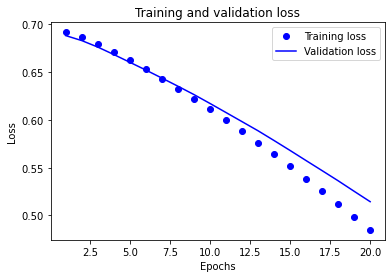

In [27]:
import matplotlib.pyplot as plt
    
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

I trully am not sure of what to makes of this chart. It seems that as the model starts overfitting quite early, at maybe 5 epochs.

In [28]:
history_dict['accuracy']

[0.5838658,
 0.7236422,
 0.79632586,
 0.8714058,
 0.92571884,
 0.9456869,
 0.9416933,
 0.9416933,
 0.9440895,
 0.9456869,
 0.9448882,
 0.9456869,
 0.94728434,
 0.94808304,
 0.94728434,
 0.951278,
 0.9504792,
 0.9520767,
 0.95447284,
 0.95447284]

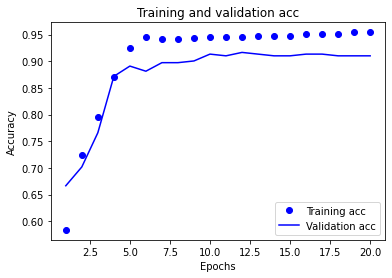

In [29]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Same with this seems it starts overfiting quite early too with the accuracy of the training data falling. This may have something to do with the size of the dataset.

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (2727,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_dl, y_train_dl, epochs = 10, batch_size = 512)

results_dl_val = model.evaluate(x_test_dl, y_test_dl)

results_dl_val

Train on 1564 samples
Epoch 1/10
1564/1564 [==============================] - 1s 759us/sample - loss: 0.6900 - accuracy: 0.5767
Epoch 2/10
1564/1564 [==============================] - 0s 31us/sample - loss: 0.6790 - accuracy: 0.6113
Epoch 3/10
1564/1564 [==============================] - 0s 34us/sample - loss: 0.6655 - accuracy: 0.6957
Epoch 4/10
1564/1564 [==============================] - 0s 31us/sample - loss: 0.6506 - accuracy: 0.8120
Epoch 5/10
1564/1564 [==============================] - 0s 23us/sample - loss: 0.6351 - accuracy: 0.8523
Epoch 6/10
1564/1564 [==============================] - 0s 32us/sample - loss: 0.6197 - accuracy: 0.8715
Epoch 7/10
1564/1564 [==============================] - 0s 24us/sample - loss: 0.6048 - accuracy: 0.8894
Epoch 8/10
1564/1564 [==============================] - 0s 26us/sample - loss: 0.5896 - accuracy: 0.9073
Epoch 9/10
1564/1564 [==============================] - 0s 27us/sample - loss: 0.5739 - accuracy: 0.9290
Epoch 10/10
1564/1564 [=========

[0.5708209811424723, 0.85459185]

In [31]:
# Build Model 2 with hire Capacity

model_2 = models.Sequential()

model_2.add(layers.Dense(32, activation = 'relu', input_shape = (2727,)))
model_2.add(layers.Dense(32, activation = 'relu'))
model_2.add(layers.Dense(1, activation = 'sigmoid'))

model_2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [32]:
# Train and Validate for Model 2

history_2 = model_2.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Train on 1252 samples, validate on 312 samples
Epoch 1/20
1252/1252 [==============================] - 1s 1ms/sample - loss: 0.6904 - accuracy: 0.5431 - val_loss: 0.6845 - val_accuracy: 0.6795
Epoch 2/20
1252/1252 [==============================] - 0s 76us/sample - loss: 0.6784 - accuracy: 0.7492 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 3/20
1252/1252 [==============================] - 0s 81us/sample - loss: 0.6632 - accuracy: 0.8171 - val_loss: 0.6586 - val_accuracy: 0.8590
Epoch 4/20
1252/1252 [==============================] - 0s 93us/sample - loss: 0.6440 - accuracy: 0.8914 - val_loss: 0.6411 - val_accuracy: 0.8686
Epoch 5/20
1252/1252 [==============================] - 0s 78us/sample - loss: 0.6220 - accuracy: 0.9073 - val_loss: 0.6220 - val_accuracy: 0.8814
Epoch 6/20
1252/1252 [==============================] - 0s 78us/sample - loss: 0.5978 - accuracy: 0.9169 - val_loss: 0.6014 - val_accuracy: 0.8910
Epoch 7/20
1252/1252 [==============================] - 0s 83us/sample -

In [33]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history_dict_2['loss']

[0.690373136593511,
 0.6783780964037862,
 0.6631548252349464,
 0.6440442404427087,
 0.621981432262701,
 0.5977887056125238,
 0.57217389268997,
 0.5458656549453735,
 0.519233012351746,
 0.49261175795865897,
 0.465988437207743,
 0.44029746545008575,
 0.41519121373423373,
 0.39089983758834984,
 0.3678001170150769,
 0.34546194565943633,
 0.3242037839973316,
 0.3040447914943147,
 0.28500945194841576,
 0.267187742665172]

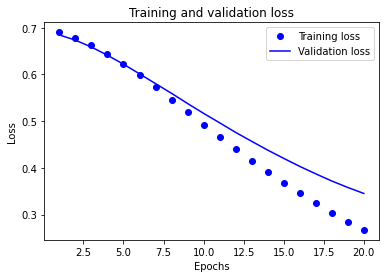

In [35]:
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
history_dict_2['accuracy']

[0.543131,
 0.7492013,
 0.81709266,
 0.8913738,
 0.9073482,
 0.9169329,
 0.928115,
 0.9345048,
 0.94009584,
 0.9376997,
 0.942492,
 0.94728434,
 0.9456869,
 0.94808304,
 0.9488818,
 0.951278,
 0.951278,
 0.9528754,
 0.95367414,
 0.95447284]

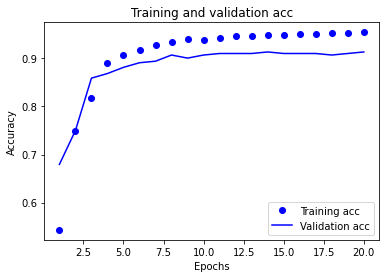

In [37]:
plt.clf()

acc = history_dict_2['accuracy']
val_acc = history_dict_2['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
# Build Model 3 with hire Capacity

model_3 = models.Sequential()

model_3.add(layers.Dense(64, activation = 'relu', input_shape = (2727,)))
model_3.add(layers.Dense(64, activation = 'relu'))
model_3.add(layers.Dense(1, activation = 'sigmoid'))

model_3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [39]:
# Train and Validate for Model 2

history_3 = model_3.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Train on 1252 samples, validate on 312 samples
Epoch 1/20
1252/1252 [==============================] - 1s 1ms/sample - loss: 0.6897 - accuracy: 0.5327 - val_loss: 0.6795 - val_accuracy: 0.8365
Epoch 2/20
1252/1252 [==============================] - 0s 112us/sample - loss: 0.6709 - accuracy: 0.8850 - val_loss: 0.6575 - val_accuracy: 0.8910
Epoch 3/20
1252/1252 [==============================] - 0s 150us/sample - loss: 0.6424 - accuracy: 0.9145 - val_loss: 0.6288 - val_accuracy: 0.8974
Epoch 4/20
1252/1252 [==============================] - 0s 130us/sample - loss: 0.6060 - accuracy: 0.9193 - val_loss: 0.5951 - val_accuracy: 0.9006
Epoch 5/20
1252/1252 [==============================] - 0s 136us/sample - loss: 0.5638 - accuracy: 0.9297 - val_loss: 0.5593 - val_accuracy: 0.9038
Epoch 6/20
1252/1252 [==============================] - 0s 251us/sample - loss: 0.5194 - accuracy: 0.9393 - val_loss: 0.5228 - val_accuracy: 0.9071
Epoch 7/20
1252/1252 [==============================] - 0s 187us/sa

In [40]:
history_dict_3 = history_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history_dict_3['loss']

[0.6897259830666808,
 0.6708736579639082,
 0.6424419308622805,
 0.6059815744622447,
 0.5637904279909957,
 0.5194402388490427,
 0.4746981966800202,
 0.43106612210837414,
 0.3899949514827789,
 0.35160625418915914,
 0.31671696882278394,
 0.2859380652729315,
 0.25811681979761336,
 0.23258067224734127,
 0.21021274969981502,
 0.19028322927106303,
 0.172369350497715,
 0.1568659036018597,
 0.14304454586566828,
 0.13089273303461532]

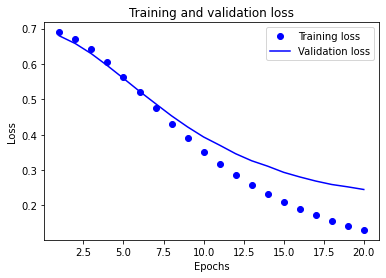

In [42]:
loss = history_dict_3['loss']
val_loss = history_dict_3['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
history_dict_3['accuracy']

[0.5327476,
 0.884984,
 0.9145367,
 0.91932905,
 0.9297125,
 0.93929714,
 0.9384984,
 0.94728434,
 0.94728434,
 0.94808304,
 0.9496805,
 0.95447284,
 0.9520767,
 0.95447284,
 0.9592652,
 0.9592652,
 0.96166134,
 0.9632588,
 0.9648562,
 0.96565497]

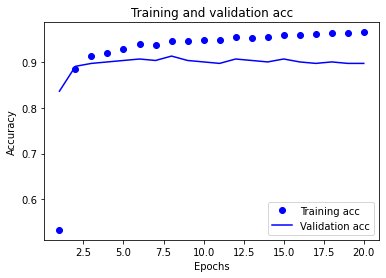

In [44]:
plt.clf()

acc = history_dict_3['accuracy']
val_acc = history_dict_3['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
# Build Model 4 with hire Capacity

model_4 = models.Sequential()

model_4.add(layers.Dense(256, activation = 'relu', input_shape = (2727,)))
model_4.add(layers.Dense(256, activation = 'relu'))
model_4.add(layers.Dense(1, activation = 'sigmoid'))

model_4.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [46]:
# Train and Validate for Model 2

history_4 = model_4.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Train on 1252 samples, validate on 312 samples
Epoch 1/20
1252/1252 [==============================] - 2s 1ms/sample - loss: 0.6835 - accuracy: 0.6278 - val_loss: 0.6402 - val_accuracy: 0.8942
Epoch 2/20
1252/1252 [==============================] - 0s 167us/sample - loss: 0.6046 - accuracy: 0.9297 - val_loss: 0.5285 - val_accuracy: 0.8782
Epoch 3/20
1252/1252 [==============================] - 0s 172us/sample - loss: 0.4635 - accuracy: 0.9361 - val_loss: 0.4059 - val_accuracy: 0.9071
Epoch 4/20
1252/1252 [==============================] - 0s 161us/sample - loss: 0.3210 - accuracy: 0.9481 - val_loss: 0.3211 - val_accuracy: 0.9103
Epoch 5/20
1252/1252 [==============================] - 0s 145us/sample - loss: 0.2229 - accuracy: 0.9545 - val_loss: 0.2778 - val_accuracy: 0.9038
Epoch 6/20
1252/1252 [==============================] - 1s 430us/sample - loss: 0.1636 - accuracy: 0.9633 - val_loss: 0.2456 - val_accuracy: 0.9103
Epoch 7/20
1252/1252 [==============================] - 0s 342us/sa

In [47]:
history_dict_4 = history_4.history
history_dict_4.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
history_dict_4['loss']

[0.683535111026642,
 0.6046281955874385,
 0.46346104468781346,
 0.3209787633853218,
 0.22289604491319137,
 0.16359021298039836,
 0.12569993834335583,
 0.10088394446590077,
 0.08344276451740783,
 0.06978979180700863,
 0.06024978347955801,
 0.052702873362043795,
 0.04635180218722493,
 0.043274533515349746,
 0.036666248148432175,
 0.03407880733497798,
 0.03136835418665371,
 0.02926476205737827,
 0.027060702466926635,
 0.025823034804326277]

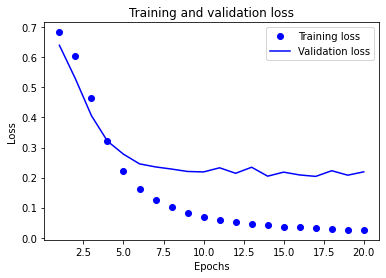

In [49]:
loss = history_dict_4['loss']
val_loss = history_dict_4['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [50]:
history_dict_4['accuracy']

[0.6277955,
 0.9297125,
 0.9361022,
 0.94808304,
 0.95447284,
 0.9632588,
 0.9632588,
 0.96565497,
 0.9744409,
 0.98083067,
 0.9792332,
 0.98801917,
 0.98801917,
 0.9888179,
 0.98961663,
 0.98961663,
 0.98961663,
 0.99121404,
 0.99121404,
 0.9920128]

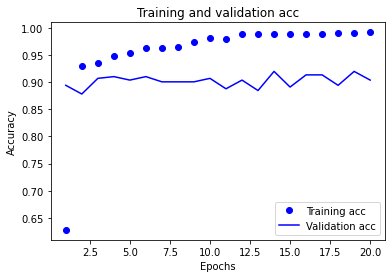

In [51]:
plt.clf()

acc = history_dict_4['accuracy']
val_acc = history_dict_4['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__Results__
with this image it is now clear to see that at around 7-10 epochs there is marginal returns in building more capacity in the network. How about batch size?

### Grid Search for best hyper-parameters for Deep Learning.
This section was accomplished courtesy of Jason Brownlee at [Machine Learning Mastery](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/).

The disadvantage of the train and validate apporach is that we can find a reasonable estimiate to the number of Epochs but that is not the only hyper-parameter. There are other hyper-parameters:
1.	__Number of Hidden Layers:__ These are the number of layers between input layer and the output layer. The idea is very simple, Keep adding layers until the test error does not improve anymore. 

2.	__Dropout:__ Dropout is the regularisation technique to avoid overfitting by increasing the validation accuracy thus increasing the generalising power. 

3.	__Network Weight Initialisation:__ Ideally, it may be better to use different weight initialisation schemes according to the activation function used on each layer.

4.	__Activation Function:__ Activation functions are used to introduced nonlinearity to models, which allows deep learning models to learn nonlinear prediction boundaries. Rectifier activation function is the most popular. Sigmoid is used in the output layer while making binary predictions. SoftMax is used in the output layer while making multi-class predictions.

5.	__Learning Rate:__ The learning rate defines how quickly a network updates its parameters. Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge.

6.	__Momentum:__ Momentum helps to know the direction of the next step with the knowledge of the previous steps. It helps to prevent oscillations. A typical choice of moment is between 0.5 to 0.9.

7.	__Number of epochs:__ Number of epochs is the number of times the whole training data is shown to the network while training. Increase the number of epochs until the validation accuracy starts decreasing even when training accuracy is increasing (overfitting).

8.	__Batch Size:__ Mini batch size is the number of sub samples given to the network after which parameter update happens.

Since the outcome was not as desired since it was not as clear I will perform a grid search starting to also incude the optimal Batch size.

In [52]:
# Use scikit-learn and Keras to grid search the batch size and epochs

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import timeit

def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=2727, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
    return model

start_time = timeit.default_timer()
model = KerasClassifier(build_fn=create_model, verbose=0)

scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }

batch_size = [10, 20, 40, 60, 80, 100]
# batch_size = [x for x in range(1,30)]

epochs = [5, 7, 10, 12, 15, 17, 20, 22, 25]
# epochs = [x for x in range(1,30)]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=3, 
                    scoring=scorers,
                   refit="accuracy_score")

grid_result = grid.fit(x_train_dl, y_train_dl)

elapsed_dl = timeit.default_timer() - start_time

print(grid_result.best_params_)
print('Time elapsed to find those 6 parameters each one limited to max of three was {} seconds.'.format(
    round(elapsed_dl,2)))

Using TensorFlow backend.


{'batch_size': 40, 'epochs': 5}
Time elapsed to find those 6 parameters each one limited to max of three was 1517.42 seconds.


Performing such an experimentation on 2 hyper-parameters is a computationally expensive task. Admittedly my laptop is a GPU but dated 2018 and the process above is simplified tremedously. Ideally you would loop through all the known values of Epochs and Batch Size within a certain range to find the most optimum. You would also repeat this process for all the 8 hyperparameters.

You also have to keep in mind of Information Leak. Everytime you run the model towards tuning your hyper-parameters the risk of overfitting increases. So you would need a very large dataset.

In [55]:
# Model 5 with updated Btach Size

from keras import regularizers

model_5 = models.Sequential()
model_5.add(layers.Dense(256, activation = 'relu', input_shape = (2727,)))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(256, activation = 'relu'))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(1, activation = 'sigmoid'))

model_5.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model_5.fit(x_train_dl, y_train_dl, epochs = 5, batch_size = 40)

results_dl_final = model_5.evaluate(x_test_dl, y_test_dl)

results_dl_final

Train on 1564 samples
Epoch 1/5
1564/1564 [==============================] - 2s 1ms/sample - loss: 0.5800 - accuracy: 0.7749
Epoch 2/5
1564/1564 [==============================] - 1s 754us/sample - loss: 0.2691 - accuracy: 0.9162
Epoch 3/5
1564/1564 [==============================] - 2s 1ms/sample - loss: 0.1564 - accuracy: 0.9405
Epoch 4/5
1564/1564 [==============================] - 2s 1ms/sample - loss: 0.1133 - accuracy: 0.9520
Epoch 5/5
1564/1564 [==============================] - 1s 840us/sample - loss: 0.0800 - accuracy: 0.9712
392/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.23393925355405223, 0.91071427]

# 4. Outcome

In [57]:
# Summary
print('The Accuracy Score of the Multinomial Naive Bayes Model: \t{}'.format(
    accuracy_score(y_test, predictions_nb)))
print('The Accuracy Score of the Logistic Regression Model: \t\t{}'.format(
    accuracy_score(y_test, predictions_log)))
print('The Accuracy Score of the Random Forest Model: \t\t\t{}'.format(
    accuracy_score(y_test, predictions_ran)))
print('The Accuracy Score of Random Forest best parameters: \t\t{}'.format(
    accuracy_score(y_test, predictions_grid)))
print('The Accuracy Score of Deep Learning: \t\t\t\t{}'.format(results_dl_val[1]))
print('The Accuracy Score of Deep Learning Final: \t\t\t{}'.format(
    results_dl_final[1]))

The Accuracy Score of the Multinomial Naive Bayes Model: 	0.9107142857142857
The Accuracy Score of the Logistic Regression Model: 		0.9107142857142857
The Accuracy Score of the Random Forest Model: 			0.9132653061224489
The Accuracy Score of Random Forest best parameters: 		0.8443877551020408
The Accuracy Score of Deep Learning: 				0.8545918464660645
The Accuracy Score of Deep Learning Final: 			0.9107142686843872


## 4.1. Results on Shallow Models

In the paper by Alberto et al the measures of accuracy for there models were:
- Multinomial Naive Bayes: 90.91% - 93.75%
- Logistic Regression:     92.45% - 97.04%
- Random Forest:           91.51% - 95.56%

Our model did not do as well as Alberto et al. but an explanation maybe the fact that our model might be averaging across the entire dataset unlike their approach of treating each dataset separetly and unique.

## 4.2. Results on Deep Model.
In the attempts of using Neural Networks to achieve higher results, that was not forthcoming. Even with parameter tuning I was not able to achieve significant better result than the most simplest model, Naive Bayes. There are many reasons for this but cheifly is that i have limited myself to 2 parameters to tune. As mentioend there are 8. I am sure with enough time and better computers we can tune all parameters to get the desired outcome. 

I also suspect that the dataset is not large enough to take the best out of Neural Networks or maybe just maybe sometimes the simplest method (Occums Razor) is better for certain situations.

__Note:__ Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example and grid search a few times and compare the average outcome.

In terms if our model was a success? i think it was. In the book, Deep Learning with Python he says that at our level a model should be able to beat a "dumb baseline". That is, it has to have statistical power. My model does have statistical power. It has a better than chance level (0.5) of predicting whether a comment is Spam or Not. 

In the real world I would parse Youtube website for more training data, tera bytes worth, and train the model some more and improve its accuracy.

## Future Research.

In terms of Youtube comments, as Alberto et al have discovered each dataset (artists comments) is different and thus the data may be suited to a different model. This brings its own challenges and makes the task of removing spam comments computationally expensive. Hence, maybe why Google have yet to deployed a model that does it. In saying this computing power has expanded quite a bit since 2015 when the initial paper was published and Google does not use a singular laptop as I do. Infact Google has recently announced a quantum computer project so in time the opportunity to do current computationally expensive models will arrive.